# German Corpus Analysis

Name : Noubissie Diepe Ange Odilon

Matriculation number: 22211243

## About the corpus
- [German Corpus (Type:News,Year:2020) link](https://wortschatz.uni-leipzig.de/en/download/German#corpora_type_news/deu_news_2020_1M.tar.gz)
- [German words list](https://github.com/hermitdave/FrequencyWords/blob/master/content/2018/de/de_full.txt)
- [German stopwords](https://countwordsfree.com/stopwords/german)


### Standalone repo
[Github link](https://github.com/artemesian/corpus-analysis/tree/main)



## Installation

In [18]:
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Download neccessary modules of NLTK

In [19]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
corpus_path = "./deu_news_2020_1M-sentences.txt"
wordlist_path = "./de_full.txt"
stopwords_path = "./stop_words_german.txt"

# Read Corpus
f = open(corpus_path, encoding="utf-8", mode="r")
text_corpus = f.read()

# Read Wordlist
f = open(wordlist_path, encoding="utf-8", mode="r")
de_wordlist = f.read()

# Read stopwords
f = open(stopwords_path, encoding="utf-8", mode="r")
de_stopwords = f.read()

In [21]:
len(text_corpus)

114471773

## Data preprocessing
- Remove line numbers in corpus
- Remove counts in wordlist
- Get rid off special characters both in corpus and wordlist
- Lowercase wordlist and corpus

In [62]:
import re

def remove_special_characters(text):
    # Define regex pattern to match allowed German characters (including umlauts, Eszett, and spaces)
    pattern = re.compile(r'[a-zA-ZäöüßÄÖÜẞ \n]')
    # Use regex to find all allowed characters in the text
    german_characters = pattern.findall(text)
    # Rejoin the characters to form the new string
    german_text = ''.join(german_characters)

    return german_text

def extract_text_without_numbers(text):
    lines = text.split('\n')
    result = []
    for line in lines:
        # Use regex to remove the numbers
        text_without_numbers = re.sub(r'\d+', '', line).strip()
        result.append(text_without_numbers)
    return result

def remove_numbers(words):
  return list(filter(lambda w: not w.isnumeric(), words))

text_corpus = remove_special_characters(text_corpus.strip())
text_corpus = text_corpus.lower()
words_corpus = nltk.word_tokenize(text_corpus)
words_corpus = remove_numbers(words_corpus)

In [53]:
print(words_corpus[:50])

['tote', 'am', 'tag', 'sind', 'in', 'nur', 'tagen', 'im', 'monat', 'eine', 'kleinstadt', 'menschen', 'sollen', 'zusätzlich', 'in', 'qualifizierungsmaßnahmen', 'kommen', 'werbedollar', 'können', 'ein', 'mächtiges', 'werkzeug', 'sein', 'aber', 'dafür', 'kann', 'man', 'keine', 'uswahl', 'kaufen', 'schreibt', 'bosworth', 'frauen', 'im', 'sexgewerbe', 'haben', 'verschiedene', 'gründe', 'warum', 'sie', 'tun', 'was', 'sie', 'tun', 'zuschauer', 'sind', 'besser', 'als', 'keine', 'zuschauer']


In [65]:
def simple_remove_special_characters(text):
    return re.sub(r'[^\w\säöüßÄÖÜẞ]', '', text)

de_wordlist = simple_remove_special_characters(de_wordlist.strip())
de_wordlist = extract_text_without_numbers(de_wordlist)
print(de_wordlist[:50])

['ich', 'sie', 'das', 'ist', 'du', 'nicht', 'die', 'es', 'und', 'der', 'wir', 'was', 'zu', 'er', 'ein', 'in', 'ja', 'mir', 'mit', 'wie', 'den', 'mich', 'auf', 'dass', 'aber', 'eine', 'so', 'hat', 'hier', 'haben', 'für', 'sind', 'war', 'von', 'wenn', 'dich', 'ihr', 'nein', 'habe', 'an', 'bin', 'noch', 'nur', 'da', 'dir', 'sich', 'einen', 'uns', 'hast', 'dem']


## #4) Calculate the lexical richness of the selected corpus

In [28]:
def compute_lexical_richness(text):
  return len(set(text))/len(text)

l_richness = compute_lexical_richness(words_corpus)
print(f'Lexical Richness of this corpus : {l_richness}')

Lexical Richness of this corpus : 0.0380116338904686


## #5) Plot the character distribution of your selected corpus

Preview of the head : [('e', 14313482), ('n', 8812372), ('i', 7051801), ('r', 6618069), ('t', 5652631), ('s', 5626585), ('a', 5338554), ('d', 4221696), ('h', 3676269), ('u', 3320193), ('l', 3264483), ('g', 2642022), ('o', 2486789), ('m', 2456338), ('c', 2411441), ('b', 1822400), ('f', 1593607), ('k', 1310065), ('w', 1310042), ('z', 1110104), ('p', 912401), ('v', 841690), ('ü', 570013), ('ä', 501841), ('ö', 238611)]


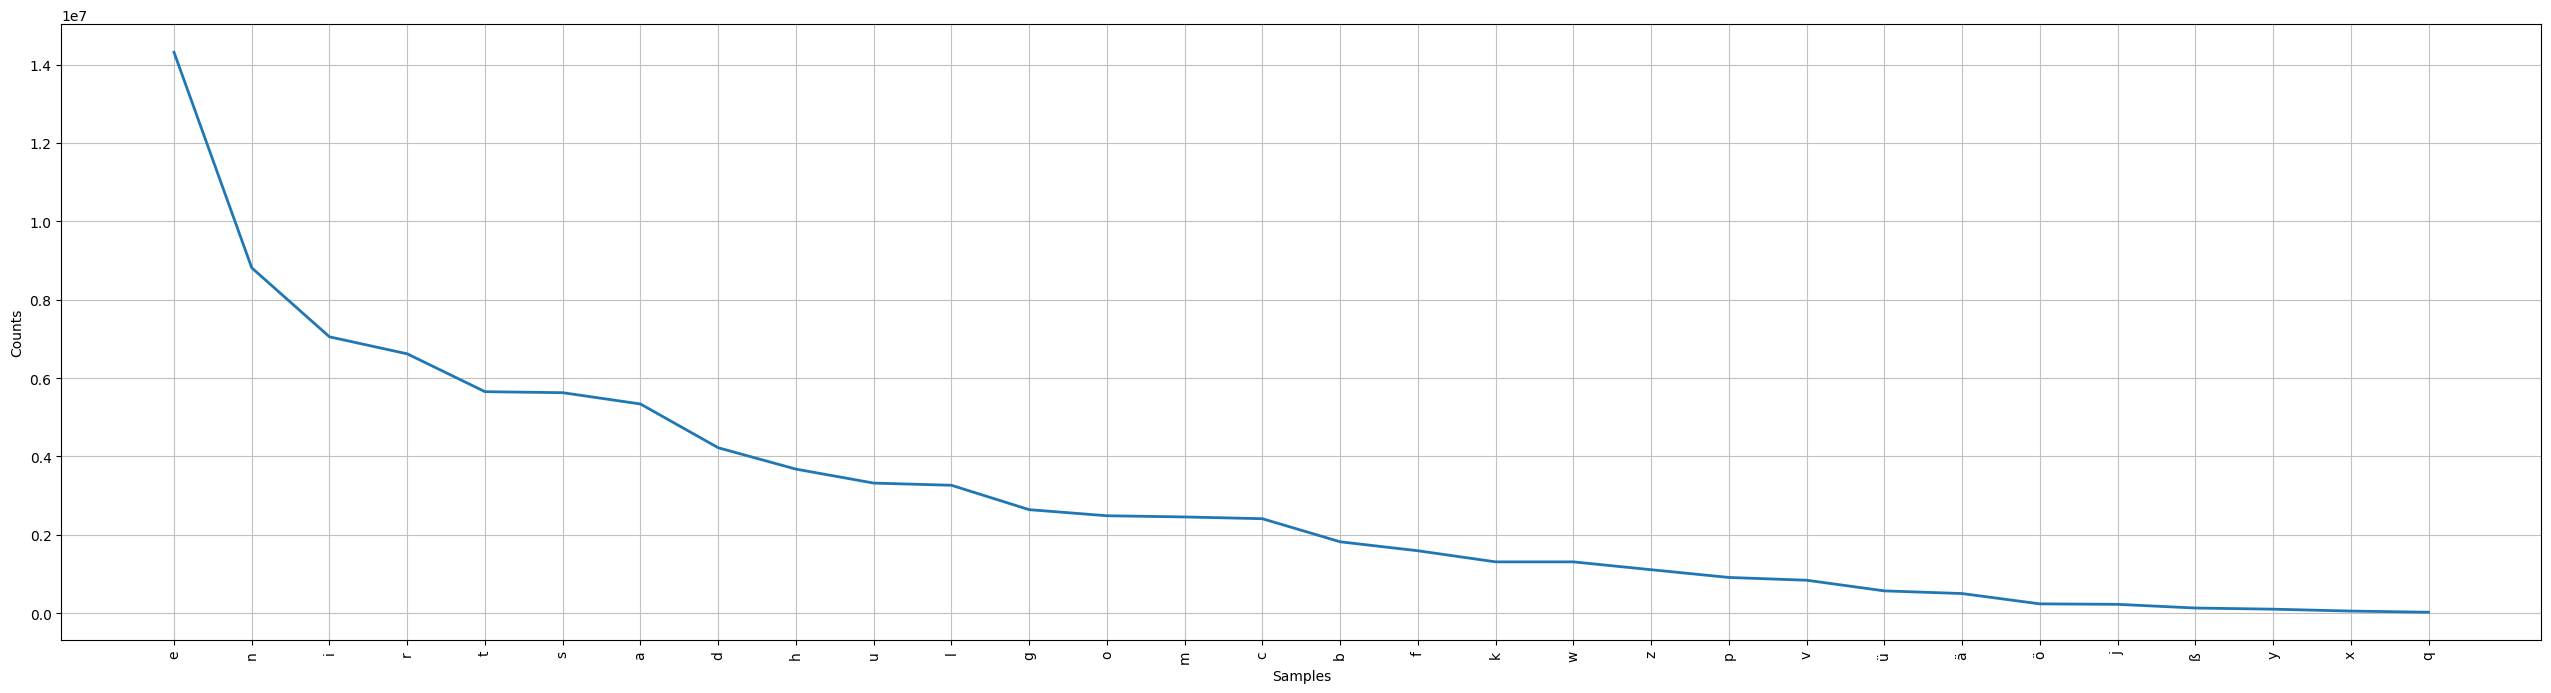

<Axes: xlabel='Samples', ylabel='Counts'>

In [29]:
fdist = nltk.FreqDist(ch for ch in text_corpus if ch.isalpha())

print(f"Preview of the head : {fdist.most_common(25)}")

plt.figure(figsize=(32, 8))

## Character distribution
fdist.plot()

## #6)  Plot the word distribution of the 20 most often used words of your selected corpus (with stopwords).

Preview of the head : [('die', 536482), ('der', 503861), ('und', 332589), ('in', 296011), ('das', 189675), ('den', 173106), ('mit', 148012), ('zu', 141975), ('von', 137573), ('im', 135746), ('auf', 131222), ('ist', 127306), ('für', 124645), ('es', 122072), ('sich', 115719), ('ein', 111515), ('nicht', 106422), ('auch', 103869), ('eine', 99145), ('dem', 96140)]


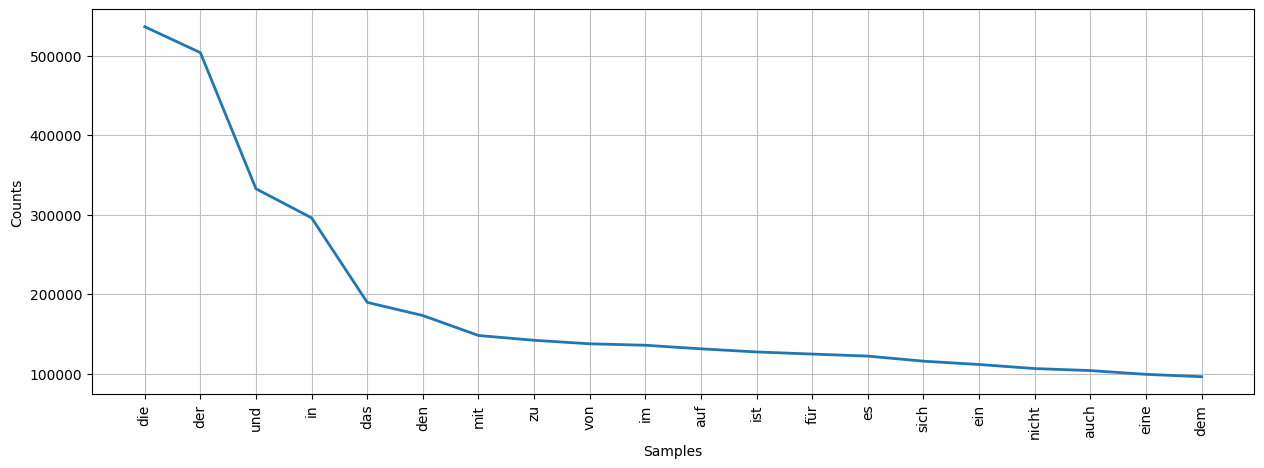

In [30]:
def plot_word_dist(corpus):
  fdist = nltk.FreqDist(corpus)
  print(f"Preview of the head : {fdist.most_common(20)}")

  plt.figure(figsize=(15, 5))

  ## Top 20 words distribution
  fdist.plot(20)

plot_word_dist(words_corpus)

## #7) Plot the dispersion plot of the 5 most often used words.

Most common 5 words : ['die', 'der', 'und', 'in', 'das']


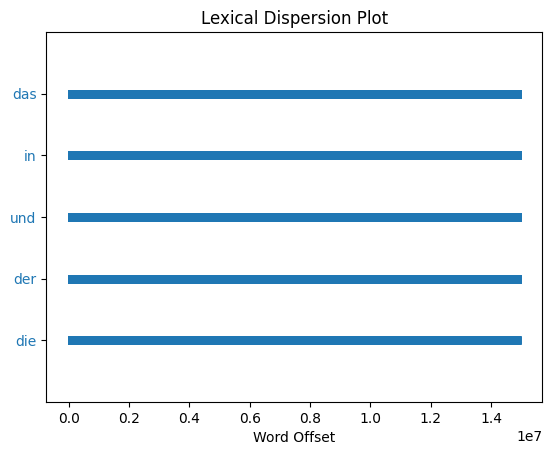

In [31]:
def plot_lexical_disp(corpus):
  top_5 = fdist = nltk.FreqDist(corpus).most_common(5)
  top_words = [word for (word, count) in top_5]

  print(f'Most common 5 words : {top_words}')
  text = nltk.Text(corpus)
  plot = text.dispersion_plot( top_words ) # Plot lexical dispersion

plot_lexical_disp(words_corpus)

## #8) Find the longest word in the text. Select an algorithm for splitting words (also called word break / split algorithm) and split the word into subwords.


NLTK doesn't have a built-in german word list. Therefore an external word list from the Opensource repository was used for the analysis.

[Github-Link](https://github.com/hermitdave/FrequencyWords/blob/master/content/2018/de)

 *(Huge thanks to them)*

In [66]:
word_lengths = [ (len(w), w) for w in words_corpus ]

word_lengths = sorted(word_lengths, key=lambda x: -len(x[1]))
longest = word_lengths[0][1]
print(word_lengths[:5])
print(f'The longest word in text : {longest}')

[(79, 'gegossengesaugtgeschrubbtgewienertgekochtgemähtgewaschengebügeltgemachtundgetan'), (79, 'linksbuntgutmenschgenderantiwirtschaftantilandwirtschaftökonwoklimaschwachmaten'), (77, 'eigentlichgibtessovielaberichbinerstauntvomangebotundweißnichtwasdasbestewäre'), (69, 'innsbruckwienmünchenfrankfurtberlinnürnbergzürichzagrebbudapestmoskau'), (66, 'spanischenbrasilianischennorwegischenniederländischenfranzösischen')]
The longest word in text : gegossengesaugtgeschrubbtgewienertgekochtgemähtgewaschengebügeltgemachtundgetan


In [35]:
def segment_word(s, word_dict):
    s = s.lower()
    word_set = set(word.lower() for word in word_dict)
    n = len(s)
    segmentation = [None] * (n + 1)
    segmentation[0] = []

    for i in range(1, n + 1):
        for j in range(i):
            if segmentation[j] is not None and s[j:i] in word_set:
                segmentation[i] = segmentation[j] + [s[j:i]]
                break

    return segmentation[-1]

subwords = segment_word(longest, de_wordlist)
print(f"The longest word has the following subwords f{subwords}")

The longest word has the following subwords f['gegossen', 'gesaugt', 'geschrubbt', 'gewienert', 'gekocht', 'gemäht', 'gewaschen', 'gebügelt', 'gem', 'achtund', 'getan']


## #9)Find a short sentence with 5 words (plus/minus 1). Create a context-free grammar for the sentence. The grammar shall show the syntactical structure of the sentence, so the terminal symbols shall be words.

In [67]:
def find_short_sentences(text):
  sentences = text.splitlines()
  short_sentences = []
  for sentence in sentences:
    words = sentence.split()
    word_count = len(words)
    if 4 <= word_count <= 6: # Check if word count is within the desired range
      short_sentences.append(sentence)
  return short_sentences

short_sentence = find_short_sentences(text_corpus)
print(f'Available short sentences : {short_sentence[:10]}...')


Available short sentences : [' menschen sollen zusätzlich in qualifizierungsmaßnahmen kommen', ' zuschauer sind besser als keine zuschauer', '   der song lässt die sonne rein', ' millionen franken sind bereits investiert', ' war es sehr schwierig für mich', ' haben wir luft geholt', ' war ein verschwendetes jahr für pubg', '  gibt es auch wieder monströse kostüme', ' will ich mich weiter verbessern', ' übrigens ein herrliches wort']...


### From all the possible corresponding short sentences, this sentence was chosen for the analysis :

*blaue tonnen sollen alte papiercontainer ersetzen*

### *Creation of the context-free grammar*



In [37]:
sentence = "blaue tonnen sollen alte papiercontainer ersetzen"

grammar = nltk.CFG.fromstring("""
  S -> NP VP V
  NP -> AdjP N
  AdjP -> 'blaue' | 'alte'
  N -> 'tonnen' | 'papiercontainer'
  VP -> V NP
  V -> 'sollen' | 'ersetzen'
""")

sentence_splitted = sentence.split()
parser = nltk.ChartParser(grammar)
trees = list(parser.parse(sentence_splitted))

# Tree Depiction
for tree in trees:
  tree.pretty_print()

                   S                                     
        ___________|________________________________      
       |                 VP                         |    
       |            _____|____                      |     
       NP          |          NP                    |    
   ____|____       |      ____|_________            |     
 AdjP       N      V    AdjP            N           V    
  |         |      |     |              |           |     
blaue     tonnen sollen alte     papiercontainer ersetzen



## #10) Select a suitable stemmer and stem every word in the sentence found with part 9

In [38]:
# Create a Snowball stemmer for German
stemmer = nltk.stem.snowball.GermanStemmer()

words = sentence.split()

# Stem each word
stemmed_words = [stemmer.stem(word) for word in words]

print(stemmed_words)

['blau', 'tonn', 'soll', 'alt', 'papiercontain', 'ersetz']


## #11)  Find a lemmatizer for the language and lemmatize every word in the sentence.

Commands to install :

```
pip install spacy
python -m spacy download de_core_news_sm
```



In [41]:
import spacy
# Load the German language model   NB: uncomment the spacy download instruction
# to download the model
# spacy.cli.download("de_core_news_sm")
nlp = spacy.load("de_core_news_sm")

doc = nlp(sentence)
lemmas = [token.lemma_ for token in doc]
print("Lemmas:", lemmas)

Lemmas: ['blau', 'Tonne', 'sollen', 'alt', 'Papiercontainer', 'ersetzen']


## #12) Remove stopwords and repeat exercises 6+7 (word distribution and dispersion plot).

Apart from the default stopwords list, an additional stopwords list was included from:

[German Stopword list Link](https://countwordsfree.com/stopwords/german)

In [52]:
default_stopwords = set(nltk.corpus.stopwords.words('german'))

stopwords_path = './stop_words_german.txt'

f = open(stopwords_path, encoding="utf-8", mode="r")
extra_stopwords = set(f.read().splitlines())

stopwords = default_stopwords | extra_stopwords

filtered_words_corpus = [w for w in words_corpus if not w in stopwords]

len(filtered_words_corpus)

6995998

Preview of the head : [('prozent', 19428), ('euro', 18337), ('polizei', 11153), ('deutschland', 11137), ('laut', 10780), ('mal', 10654), ('millionen', 9408), ('jährige', 9292), ('stadt', 8790), ('steht', 8726), ('unternehmen', 8255), ('derzeit', 8120), ('zudem', 7797), ('deutschen', 7772), ('coronavirus', 7671), ('leben', 7576), ('lassen', 7469), ('wochen', 7102), ('coronakrise', 7064), ('woche', 7029)]


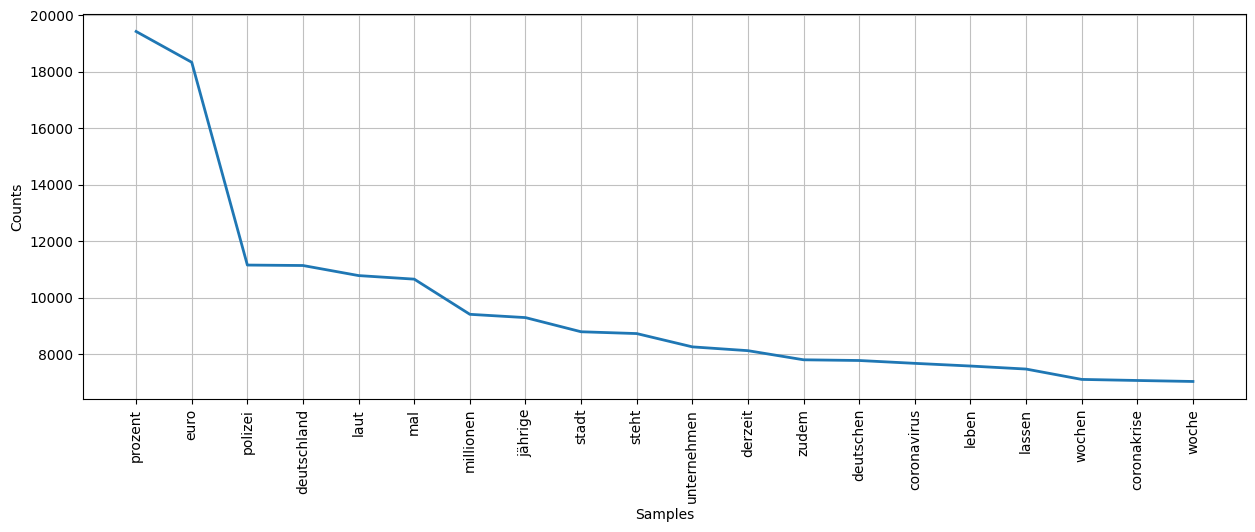

In [43]:
plot_word_dist(filtered_words_corpus)

Most common 5 words : ['prozent', 'euro', 'polizei', 'deutschland', 'laut']


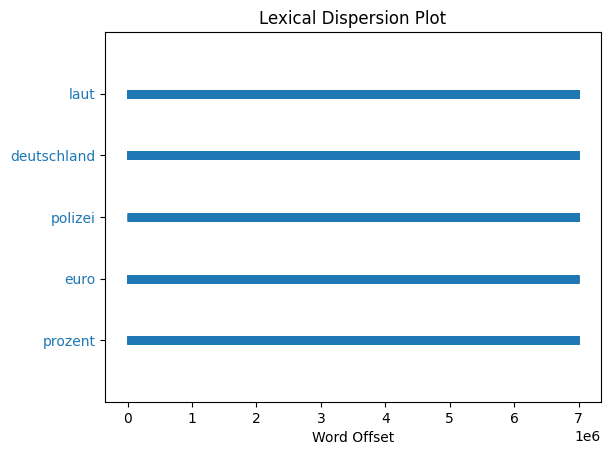

In [44]:
plot_lexical_disp(filtered_words_corpus)

## #13) Print a wordcloud without your stopwords.

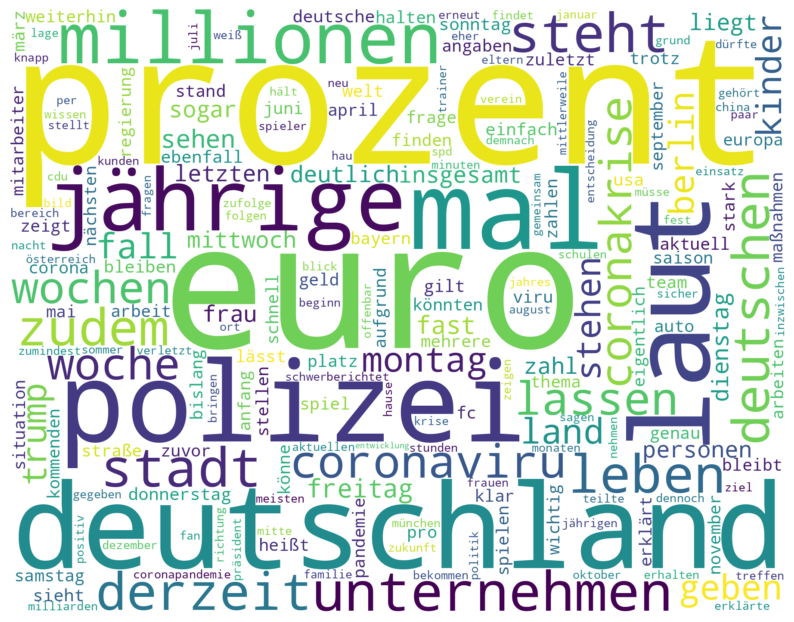

In [45]:
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(background_color="white", width=1800, height=1400, stopwords=stopwords, collocations=False).generate(" ".join(filtered_words_corpus))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()